##  Decision Tree

In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [87]:
df = pd.read_csv('Dataset/weather_data.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [96]:
#Encode categorical features(convert categorical features into numerical features)
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [97]:
#features and target
x =df.drop('Play',axis=1)
y = df['Play']
print('x:\n',x) #x
print('\n\ny:\n',y) #y


x:
     Outlook  Temperature  Humidity  Windy
0         2            1         0      0
1         2            1         0      1
2         0            1         0      0
3         1            2         0      0
4         1            0         1      0
5         1            0         1      1
6         0            0         1      1
7         2            2         0      0
8         2            0         1      0
9         1            2         1      0
10        2            2         1      1
11        0            2         0      1
12        0            1         1      0
13        1            2         0      1


y:
 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64


In [116]:
#split the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [117]:
x_train

,Outlook,Temperature,Humidity,Windy
8,2,0,1,0
2,0,1,0,0
1,2,1,0,1
13,1,2,0,1
4,1,0,1,0
7,2,2,0,0
10,2,2,1,1
3,1,2,0,0
6,0,0,1,1


In [118]:
#Decision Tree Classifier with entropy
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [119]:
# prediction and evaluation
y_pred = dt.predict(x_test)
print('y_prediction:\n',y_pred)


y_prediction:
 [1 0 0 1 1]


In [120]:
print('\n\ny_test:\n',y_test)



y_test:
 9     1
11    1
0     0
12    1
5     0
Name: Play, dtype: int64


In [121]:
print('\n\naccuracy score:',accuracy_score(y_test,y_pred))
print('\n\nclassification report:\n',classification_report(y_test,y_pred))



accuracy score: 0.6


classification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [123]:
from sklearn.feature_selection import mutual_info_classif

# Compute Information Gain (mutual information)
info_gain = mutual_info_classif(x, y, discrete_features=True)

#display the information gain scores
print('Information Gain:\n',info_gain)

info_gain_df = pd.DataFrame({'Feature': x.columns, 'Information Gain': info_gain})
info_gain_df.sort_values(by='Information Gain', ascending=False, inplace=True)
print('\n\nSorted Information Gain:\n',info_gain_df)

Information Gain:
 [0.17103394 0.02025554 0.10524435 0.03335912]


Sorted Information Gain:
        Feature  Information Gain
0      Outlook          0.171034
2     Humidity          0.105244
3        Windy          0.033359
1  Temperature          0.020256


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

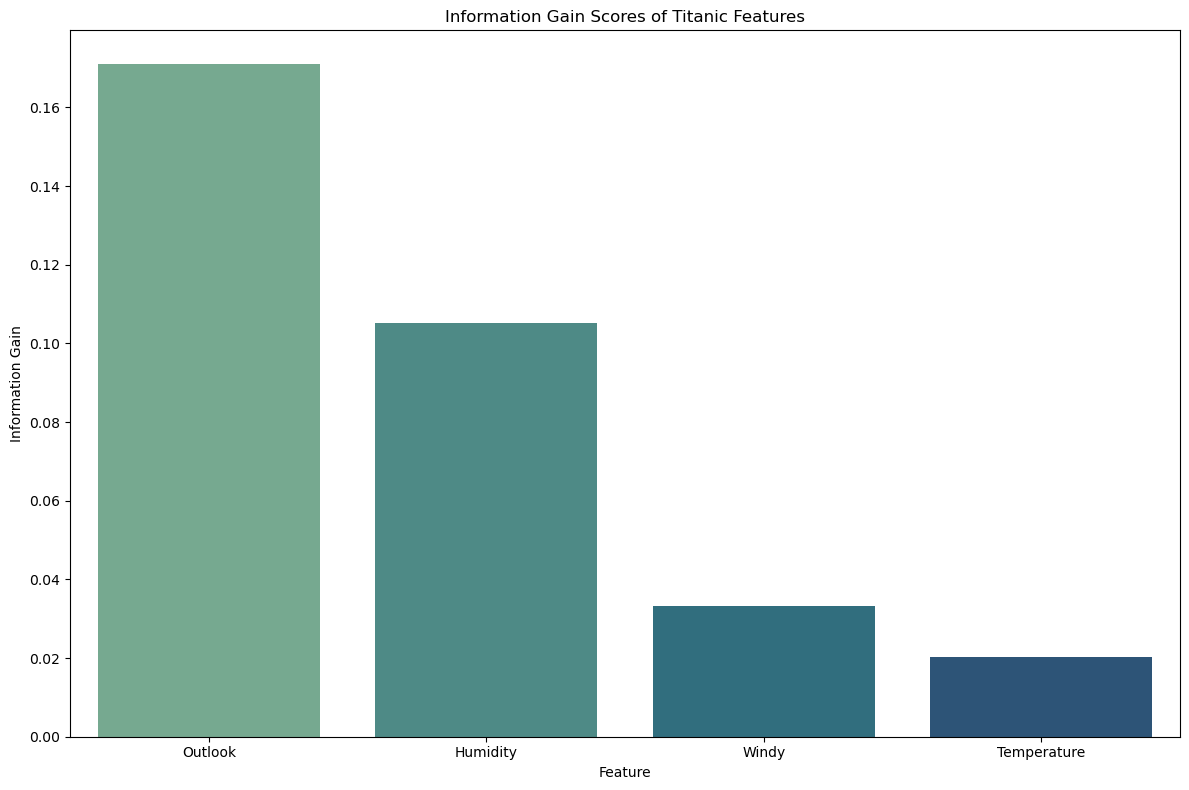

In [128]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Information Gain', data=info_gain_df, palette='crest')
plt.title("Information Gain Scores of Titanic Features")
plt.ylabel("Information Gain")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


In [133]:
from sklearn import tree

In [140]:
x.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy'], dtype='object')

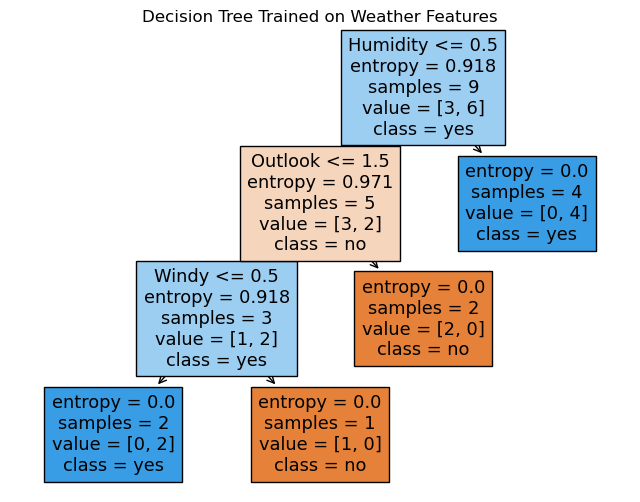

In [152]:
plt.figure(figsize=(8,6))
tree.plot_tree(dt, feature_names=x.columns.tolist(), class_names=['no','yes'], filled=True)
plt.title("Decision Tree Trained on Weather Features")
plt.show()